In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [2]:
def getJSON(url):
    response = requests.get(url)
    return response.json()

def getAPI():
    file = open('apikey.txt', 'r')
    apikey = file.read()
    file.close()
    return apikey

***References***
1. https://www.census.gov/data/developers/data-sets/abs.2019.html

**All Tables**

In [3]:
tech_characteristic = getJSON(f"https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FACTORS_P,FACTORS_P_LABEL&for=us:*&key={getAPI()}")
tech_df = pd.DataFrame(tech_characteristic[1:], columns = tech_characteristic[0])

*Changing the type of number columns*

In [4]:
tech_df['FIRMPDEMP'] = tech_df['FIRMPDEMP'].astype(float)
tech_df['RCPPDEMP'] = tech_df['RCPPDEMP'].astype(float)
tech_df['EMP'] = tech_df['EMP'].astype(float)
tech_df['PAYANN'] = tech_df["PAYANN"].astype(float)

***Splitting the Technology table into separate tables by production factors***

In [5]:
all_columns = {'GEO_ID':'GeoID' ,'NAME':'Region','NAICS2017':'IndustryID','NAICS2017_LABEL':'Industry','SEX':'SexID','SEX_LABEL':'Sex','ETH_GROUP':'EthnicityID','ETH_GROUP_LABEL':'Ethnicity','RACE_GROUP':'RaceID','RACE_GROUP_LABEL':'Race','NSFSZFI':'FirmSizeID','NSFSZFI_LABEL':'FirmSize','YEAR':'Year','FIRMPDEMP':'FirmTotal','FIRMPDEMP_F':'FirmTotalID','RCPPDEMP':'Revenue','RCPPDEMP_F':'RevenueID','EMP':'EmployeeTotal','EMP_F':'EmployeeTotalID','PAYANN':'AnnualPayroll','PAYANN_F':'AnnualPayrollID','FACTORS_P':'ProductionFactorsID','FACTORS_P_LABEL':'ProductionFactors'}
drop_columns = ['GeoID', 'IndustryID', 'SexID', 'EthnicityID', 'RaceID', 'FirmSizeID', 'Year', 'FirmTotalID', 'RevenueID', 'EmployeeTotalID', 'AnnualPayrollID', 'ProductionFactorsID']

tech_df.rename(columns = all_columns, inplace = True)

# ARTIFICIAL INTELLIGENCE, PRODUCTION FACTORS
techindex = []
for i in tech_df['ProductionFactors'].sort_values():
    if 'Artificial Intelligence' in i and 'Total Reporting' not in i and 'No factors' not in i and 'Technology not applicable' not in i and 'Required data not reliable' not in i:
        if tech_df.index[tech_df['ProductionFactors'] == i].tolist() not in techindex:
            techindex.append(tech_df.index[tech_df['ProductionFactors'] == i].tolist())
tech_ai_pf = pd.DataFrame(columns = tech_df.columns)
for i in techindex:
    for j in i:
        tech_ai_pf.loc[j] = tech_df.loc[j].copy()
tech_ai_pf.rename(columns = all_columns, inplace=True)
tech_ai_pf.drop(columns = drop_columns, axis = 1, inplace = True)

# CLOUD-BASED, PRODUCTION FACTORS
techindex = []
for i in tech_df['ProductionFactors'].sort_values():
    if 'Cloud-Based' in i and 'Total Reporting' not in i and 'No factors' not in i and 'Technology not applicable' not in i and 'Required data not reliable' not in i:
        if tech_df.index[tech_df['ProductionFactors'] == i].tolist() not in techindex:
            techindex.append(tech_df.index[tech_df['ProductionFactors'] == i].tolist())
techindex
tech_cb_pf = pd.DataFrame(columns = tech_df.columns)
for i in techindex:
    for j in i:
        tech_cb_pf.loc[j] = tech_df.loc[j].copy()
tech_cb_pf.rename(columns = all_columns, inplace = True)
tech_cb_pf.drop(columns = drop_columns, axis = 1, inplace = True)

# SPECIALIZED SOFTWARE, PRODUCTION FACTORS
techindex = []
for i in tech_df['ProductionFactors'].sort_values():
    if 'Specialized Software' in i and 'Total Reporting' not in i and 'No factors' not in i and 'Technology not applicable' not in i and 'Required data not reliable' not in i:
        if tech_df.index[tech_df['ProductionFactors'] == i].tolist() not in techindex:
            techindex.append(tech_df.index[tech_df['ProductionFactors'] == i].tolist())
tech_ss_pf = pd.DataFrame(columns = tech_df.columns)
for i in techindex:
    for j in i:
        tech_ss_pf.loc[j] = tech_df.loc[j].copy()
tech_ss_pf.rename(columns = all_columns, inplace = True)
tech_ss_pf.drop(columns = drop_columns, axis = 1, inplace = True)

# ROBOTICS, PRODUCTION FACTORS
techindex = []
for i in tech_df['ProductionFactors'].sort_values():
    if 'Robotics' in i and 'Total Reporting' not in i and 'No factors' not in i and 'Technology not applicable' not in i and 'Required data not reliable' not in i:
        if tech_df.index[tech_df['ProductionFactors'] == i].tolist() not in techindex:
            techindex.append(tech_df.index[tech_df['ProductionFactors'] == i].tolist())
tech_r_pf = pd.DataFrame(columns = tech_df.columns)
for i in techindex:
    for j in i:
        tech_r_pf.loc[j] = tech_df.loc[j].copy()
tech_r_pf.rename(columns = all_columns, inplace = True)
tech_r_pf.drop(columns = drop_columns, axis = 1, inplace = True)

# SPECIALIZED EQUIPMENT, PRODUCTION FACTORS
techindex = []
for i in tech_df['ProductionFactors'].sort_values():
    if 'Specialized Equipment' in i and 'Total Reporting' not in i and 'No factors' not in i and 'Technology not applicable' not in i and 'Required data not reliable' not in i:
        if tech_df.index[tech_df['ProductionFactors'] == i].tolist() not in techindex:
            techindex.append(tech_df.index[tech_df['ProductionFactors'] == i].tolist())
tech_se_pf = pd.DataFrame(columns = tech_df.columns)
for i in techindex:
    for j in i:
        tech_se_pf.loc[j] = tech_df.loc[j].copy()
tech_se_pf.rename(columns = all_columns, inplace = True)
tech_se_pf.drop(columns = drop_columns, axis = 1, inplace = True)

*Joining all tech tables on production factors for employee totals and revenue*

In [6]:
indeces = [0,1,2,3,4,5,6]

# Artificial Intelligence
# NAME MEANS: Tech Artifical Intelligence Production Factors (TAIPF)
taipf = tech_ai_pf[['ProductionFactors', 'EmployeeTotal', 'Revenue']].groupby(['ProductionFactors']).sum()
taipf['Index'] = indeces
taipf['ProductionFactors'] = taipf.index
taipf.set_index('Index', inplace = True)
taipf_splits = taipf['ProductionFactors'].str.split(': ', expand = True).add_prefix('ProductionFactors').copy()
taipf.drop('ProductionFactors', axis = 1, inplace = True)
taipf = taipf.join(taipf_splits)

# Cloud-Based
# NAME MEANS: Tech Cloud Based Production Factors (TCBPF)
tcbpf = tech_cb_pf[['ProductionFactors', 'EmployeeTotal', 'Revenue']].groupby(['ProductionFactors']).sum()
tcbpf['Index'] = indeces
tcbpf['ProductionFactors'] = tcbpf.index
tcbpf.set_index('Index', inplace = True)
tcbpf_splits = tcbpf['ProductionFactors'].str.split(': ', expand = True).add_prefix('ProductionFactors').copy()
tcbpf.drop('ProductionFactors', axis = 1, inplace = True)
tcbpf = tcbpf.join(tcbpf_splits)

# Robotics
# NAME MEANS: Tech Robotics Production Factors (TRPF)
trpf = tech_r_pf[['ProductionFactors', 'EmployeeTotal', 'Revenue']].groupby(['ProductionFactors']).sum()
trpf['Index'] = indeces
trpf['ProductionFactors'] = trpf.index
trpf.set_index('Index', inplace = True)
trpf_splits = trpf['ProductionFactors'].str.split(': ', expand = True).add_prefix('ProductionFactors').copy()
trpf.drop('ProductionFactors', axis = 1, inplace = True)
trpf = trpf.join(trpf_splits)

# Specialized Equipment
# NAME MEANS: Tech Specialized Equipment Production Factors (TSEPF)
tsepf = tech_se_pf[['ProductionFactors', 'EmployeeTotal', 'Revenue']].groupby(['ProductionFactors']).sum()
tsepf['Index'] = indeces
tsepf['ProductionFactors'] = tsepf.index
tsepf.set_index('Index', inplace = True)
tsepf_splits = tsepf['ProductionFactors'].str.split(': ', expand = True).add_prefix('ProductionFactors').copy()
tsepf.drop('ProductionFactors', axis = 1, inplace = True)
tsepf = tsepf.join(tsepf_splits)

# Specialized Software
# NAME MEANS: Tech Specialized Software Production Factors (TSSPF)
tsspf = tech_ss_pf[['ProductionFactors', 'EmployeeTotal', 'Revenue']].groupby(['ProductionFactors']).sum()
tsspf['Index'] = indeces
tsspf['ProductionFactors'] = tsspf.index
tsspf.set_index('Index', inplace = True)
tsspf_splits = tsspf['ProductionFactors'].str.split(': ', expand = True).add_prefix('ProductionFactors').copy()
tsspf.drop('ProductionFactors', axis = 1, inplace = True)
tsspf = tsspf.join(tsspf_splits)

joined = pd.merge(taipf, tcbpf, how = 'outer', left_on = 'ProductionFactors1', right_on = 'ProductionFactors1')
joined = pd.merge(joined, trpf, how = 'outer', left_on = 'ProductionFactors1', right_on = 'ProductionFactors1')
joined.rename(columns = {'EmployeeTotal_x':'AI_EmployeeTotal', 'Revenue_x':'AI_Revenue', 'ProductionFactors0_x':'ArtificialIntelligence', 'EmployeeTotal_y':'CB_EmployeeTotal', 'Revenue_y':'CB_Revenue', 'ProductionFactors0_y':'Cloud_Based', 'EmployeeTotal':'R_EmployeeTotal', 'Revenue':'R_Revenue', 'ProductionFactors0':'Robotics'}, inplace = True)
joined = pd.merge(joined, tsepf, how = 'outer', left_on = 'ProductionFactors1', right_on = 'ProductionFactors1')
joined = pd.merge(joined, tsspf, how = 'outer', left_on = 'ProductionFactors1', right_on = 'ProductionFactors1')
joined.rename(columns = {'ProductionFactors1':'ProductionFactors', 'EmployeeTotal_x':'SE_EmployeeTotal', 'Revenue_x':'SE_Revenue', 'ProductionFactors0_x':'SpecializedEquipment', 'EmployeeTotal_y':'SS_EmployeeTotal', 'Revenue_y':'SS_Revenue', 'ProductionFactors0_y':'SpecializedEquipment'}, inplace = True)

*Graphs*

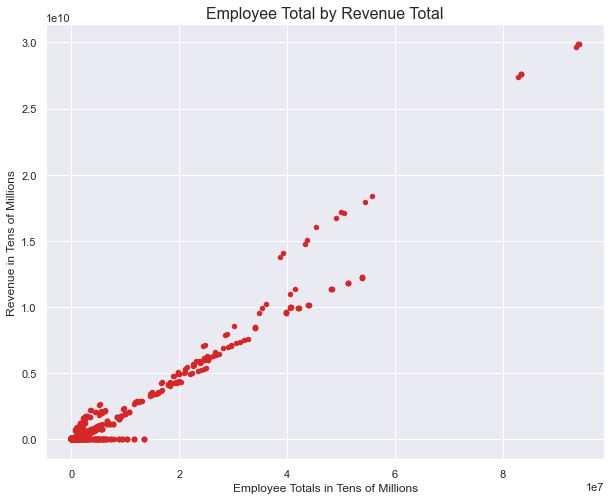

In [31]:
tech_df.plot.scatter(x = 'EmployeeTotal', y = 'Revenue', c = 'tab:red', figsize = (10,8))
plt.title('Employee Total by Revenue Total', size = 16)
plt.xlabel('Employee Totals in Tens of Millions', size = 12)
plt.ylabel('Revenue in Tens of Millions', size = 12)
plt.savefig('Pictures/tpf-rev-empl.png', bbox_inches = 'tight')
plt.show()

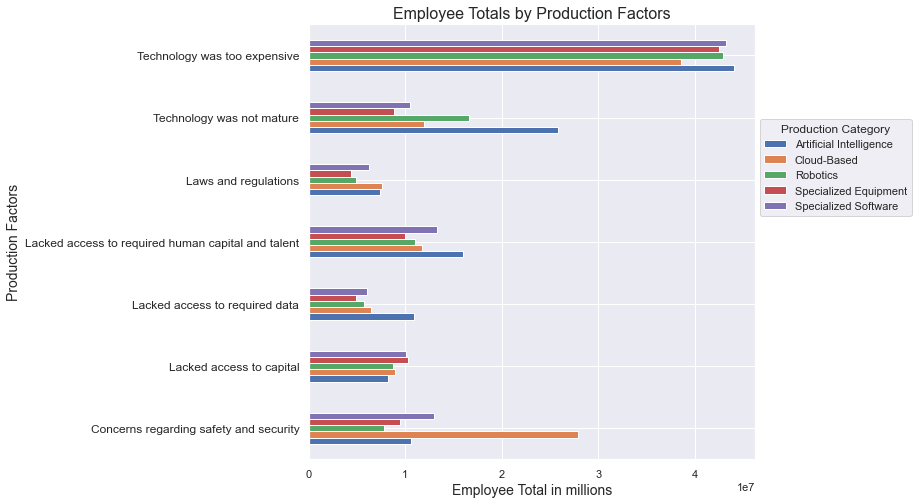

In [8]:
sns.set_theme(style = 'darkgrid')
join_plot1 = joined.plot.barh(x = 'ProductionFactors', y = ['AI_EmployeeTotal', 'CB_EmployeeTotal', 'R_EmployeeTotal', 'SE_EmployeeTotal', 'SS_EmployeeTotal'], figsize = (8,8))
plt.legend(loc = (1.01,0.56), title = 'Production Category', labels = ['Artificial Intelligence','Cloud-Based', 'Robotics', 'Specialized Equipment', 'Specialized Software'])
join_plot1.set_yticklabels(labels = ['Concerns regarding safety and security', 'Lacked access to capital', 'Lacked access to required data', 'Lacked access to required human capital and talent', 'Laws and regulations', 'Technology was not mature', 'Technology was too expensive'], size = 12)
plt.title('Employee Totals by Production Factors', size = 16)
plt.ylabel('Production Factors', size = 14)
plt.xlabel('Employee Total in millions', size = 14)
plt.savefig('Pictures/employeetotals.png', bbox_inches = 'tight')
plt.show()

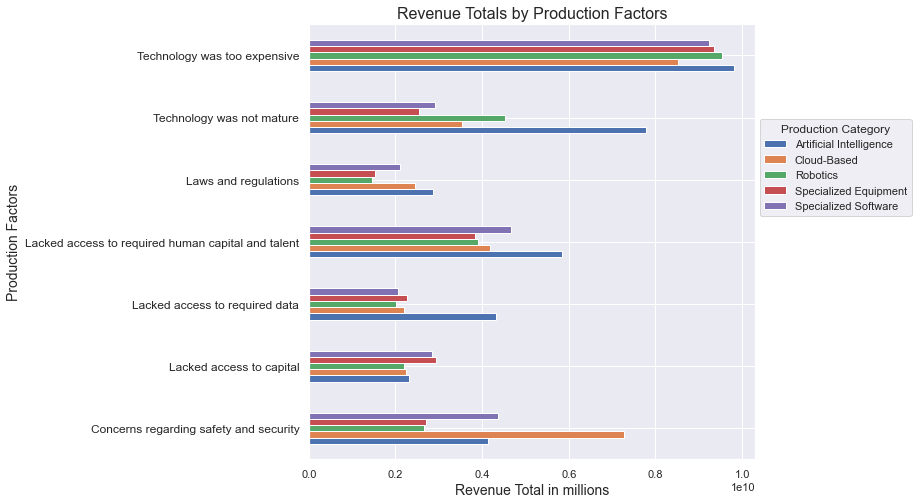

In [9]:
sns.set_theme(style = 'darkgrid')
join_plot2 = joined.plot.barh(x = 'ProductionFactors', y = ['AI_Revenue', 'CB_Revenue', 'R_Revenue', 'SE_Revenue', 'SS_Revenue'], figsize = (8,8))
plt.legend(loc = (1.01,0.56), title = 'Production Category', labels = ['Artificial Intelligence','Cloud-Based', 'Robotics', 'Specialized Equipment', 'Specialized Software'])
join_plot2.set_yticklabels(labels = ['Concerns regarding safety and security', 'Lacked access to capital', 'Lacked access to required data', 'Lacked access to required human capital and talent', 'Laws and regulations', 'Technology was not mature', 'Technology was too expensive'], size = 12)
plt.title('Revenue Totals by Production Factors', size = 16)
plt.ylabel('Production Factors', size = 14)
plt.xlabel('Revenue Total in millions', size = 14)
plt.savefig('Pictures/revenuetotals.png', bbox_inches = 'tight')
plt.show()

*Joining tech tables together on Gender for employee totals and revenue*

In [10]:
indeces = [0,1,2,3]

# Artificial Intelligence
# NAME MEANS: Tech Artificial Intelligence Production Factors _ Employee Totals Revenue (TAIPF_ETR)
taipf_etr = tech_ai_pf[['Sex', 'EmployeeTotal', 'Revenue']].groupby(['Sex']).sum()
taipf_etr['Index'] = indeces
taipf_etr['Sex'] = taipf_etr.index
taipf_etr.set_index('Index', inplace = True)
taipf_etr = taipf_etr[(taipf_etr['Sex'] != 'Equally male/female') & (taipf_etr['Sex'] != 'Total')]

# Cloud-Based
# NAME MEANS: Tech Cloud Based Production Factors _ Employee Totals Revenue (TCBPF_ETR)
tcbpf_etr = tech_cb_pf[['Sex', 'EmployeeTotal', 'Revenue']].groupby(['Sex']).sum()
tcbpf_etr['Index'] = indeces
tcbpf_etr['Sex'] = tcbpf_etr.index
tcbpf_etr.set_index('Index', inplace = True)
tcbpf_etr = tcbpf_etr[(tcbpf_etr['Sex'] != 'Equally male/female') & (tcbpf_etr['Sex'] != 'Total')]

# Robotics
# NAME MEANS: Tech Robotics Production Factors _ Employee Totals Revenue (TRPF_ETR)
trpf_etr = tech_r_pf[['Sex', 'EmployeeTotal', 'Revenue']].groupby(['Sex']).sum()
trpf_etr['Index'] = indeces
trpf_etr['Sex'] = trpf_etr.index
trpf_etr.set_index('Index', inplace = True)
trpf_etr = trpf_etr[(trpf_etr['Sex'] != 'Equally male/female') & (trpf_etr['Sex'] != 'Total')]

# Specialized Equipment
# NAME MEANS: Tech Specialized Equipment Production Factors _ Employee Totals Revenue (TSEPF_ETR)
tsepf_etr = tech_se_pf[['Sex', 'EmployeeTotal', 'Revenue']].groupby(['Sex']).sum()
tsepf_etr['Index'] = indeces
tsepf_etr['Sex'] = tsepf_etr.index
tsepf_etr.set_index('Index', inplace = True)
tsepf_etr = tsepf_etr[(tsepf_etr['Sex'] != 'Equally male/female') & (tsepf_etr['Sex'] != 'Total')]

# Specialized Software
# NAME MEANS: Tech Specialized Software Production Factors _ Employee Totals Revenue (TSsPF_ETR)
tsspf_etr = tech_ss_pf[['Sex', 'EmployeeTotal', 'Revenue']].groupby(['Sex']).sum()
tsspf_etr['Index'] = indeces
tsspf_etr['Sex'] = tsspf_etr.index
tsspf_etr.set_index('Index', inplace = True)
tsspf_etr = tsspf_etr[(tsspf_etr['Sex'] != 'Equally male/female') & (tsspf_etr['Sex'] != 'Total')]


joined2 = pd.merge(taipf_etr, tcbpf_etr, how = 'outer', left_on = 'Sex', right_on = 'Sex')
joined2 = pd.merge(joined2, trpf_etr, how = 'outer', left_on = 'Sex', right_on = 'Sex')
joined2.rename(columns = {'EmployeeTotal_x':'AI_EmployeeTotal', 'Revenue_x':'AI_Revenue', 'EmployeeTotal_y':'CB_EmployeeTotal', 'Revenue_y':'CB_Revenue', 'EmployeeTotal':'R_EmployeeTotal', 'Revenue':'R_Revenue'}, inplace = True)
joined2 = pd.merge(joined2, tsepf_etr, how = 'outer', left_on = 'Sex', right_on = 'Sex')
joined2 = pd.merge(joined2, tsspf_etr, how = 'outer', left_on = 'Sex', right_on = 'Sex')
joined2.rename(columns = {'EmployeeTotal_x':'SE_EmployeeTotal', 'Revenue_x':'SE_Revenue', 'EmployeeTotal_y':'SS_EmployeeTotal', 'Revenue_y':'SS_Revenue'}, inplace = True)

*Graphs*

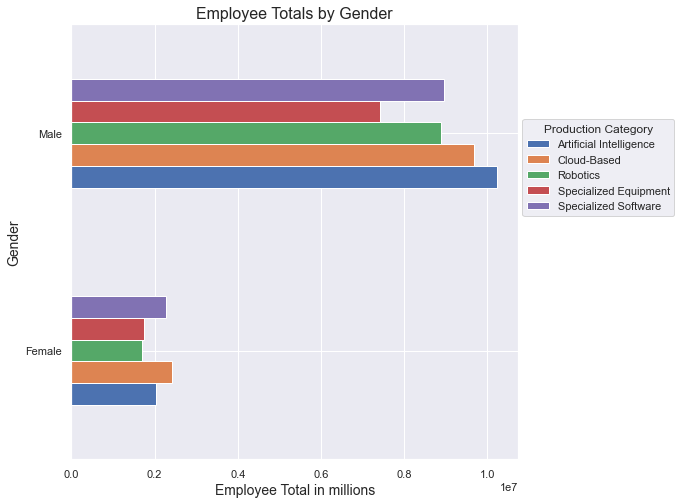

In [11]:
sns.set_theme(style = 'darkgrid')
join_plot4 = joined2.plot.barh(x = 'Sex', y = ['AI_EmployeeTotal', 'CB_EmployeeTotal', 'R_EmployeeTotal', 'SE_EmployeeTotal', 'SS_EmployeeTotal'], figsize = (8,8))
plt.legend(loc = (1.01,0.56), title = 'Production Category', labels = ['Artificial Intelligence','Cloud-Based', 'Robotics', 'Specialized Equipment', 'Specialized Software'])
plt.title('Employee Totals by Gender', size = 16)
plt.ylabel('Gender', size = 14)
plt.xlabel('Employee Total in millions', size = 14)
plt.savefig('Pictures/employeetotals-sex.png', bbox_inches = 'tight')
plt.show()

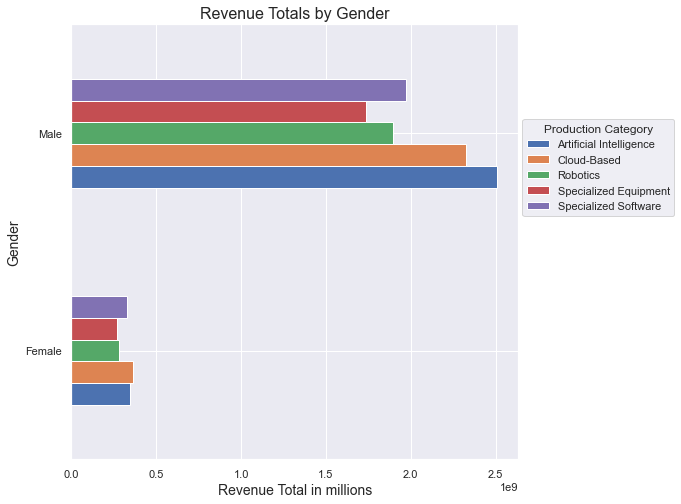

In [12]:
sns.set_theme(style = 'darkgrid')
join_plot4 = joined2.plot.barh(x = 'Sex', y = ['AI_Revenue', 'CB_Revenue', 'R_Revenue', 'SE_Revenue', 'SS_Revenue'], figsize = (8,8))
plt.legend(loc = (1.01,0.56), title = 'Production Category', labels = ['Artificial Intelligence','Cloud-Based', 'Robotics', 'Specialized Equipment', 'Specialized Software'])
plt.title('Revenue Totals by Gender', size = 16)
plt.ylabel('Gender', size = 14)
plt.xlabel('Revenue Total in millions', size = 14)
plt.savefig('Pictures/revenuetotals-sex.png', bbox_inches = 'tight')
plt.show()